# Import Packages

In [1]:
# suport
import pandas as pd
import numpy as np
# import seaborn as sn
from sklearn.model_selection import train_test_split
# import matplotlib.pyplot as plt

# model
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# evaluasi
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [10]:
import warnings
warnings.filterwarnings('ignore')

# Persiapan

In [2]:
# membaca dataset
dataset = pd.read_excel('dataset2.xlsx',converters={'Medical result（0 No；1 mild；2 severe）':int})

# mengisi kolom yg kosong dengan 0
col_set = dataset.columns
for column in col_set :
    dataset[column].fillna(0, inplace = True)

# memisahkan kelas yang akan diklasifikasikan dengan fitur
X = dataset.iloc[:,:-1]
y = dataset['Medical result（0 No；1 mild；2 severe）']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Hasil Bawaan

## Inisialisasi Model

In [78]:
# Decision Tree Classifier
model_tree = OneVsRestClassifier(tree.DecisionTreeClassifier())

# Logistics Regression Classifier
model_logistic = OneVsRestClassifier(LogisticRegression(penalty='l2'))

# Gradient Boosting Decision Tree Classifier
model_GBDT = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=300))

# Support Vector CLassifier
model_SVC = OneVsRestClassifier(LinearSVC(random_state = 0))

## Fitting dan Predict Model

In [79]:
# Decision Tree Classifier
model_tree.fit(X_train,Y_train)
y_predict_tree = model_tree.predict(X_test)

# Logistics Regression Classifier
model_logistic.fit(X_train,Y_train)
y_predict_logistic = model_logistic.predict(X_test)

# Gradient Boosting Decision Tree Classifier
model_GBDT.fit(X_train,Y_train)
y_predict_GBDT = model_GBDT.predict(X_test)

# Support Vector CLassifier
model_SVC.fit(X_train,Y_train)
y_predict_SVC = model_SVC.predict(X_test)

## Evaluasi

### Precision Recall Fscore dan Support

In [80]:
# Decision Tree Classifier
# precision_recall_fscore_support(Y_test, y_predict_tree, average=None)
precision_recall_fscore_support(Y_test, y_predict_tree, average='macro')

(0.8527596223674655, 0.8634085213032581, 0.8523703407424338, None)

In [81]:
# Logistics Regression Classifier
# precision_recall_fscore_support(Y_test, y_predict_logistic, average=None)
precision_recall_fscore_support(Y_test, y_predict_logistic, average='macro')

(0.6722417840375586, 0.568671679197995, 0.5896276854282103, None)

In [82]:
# Gradient Boosting Decision Tree Classifier
# precision_recall_fscore_support(Y_test, y_predict_GBDT, average=None)
precision_recall_fscore_support(Y_test, y_predict_GBDT, average='macro')

(0.9289891395154553, 0.9137218045112783, 0.9201821074257941, None)

In [83]:
# Support Vector CLassifier
# precision_recall_fscore_support(Y_test, y_predict_SVC, average=None)
precision_recall_fscore_support(Y_test, y_predict_SVC, average='macro')

(0.6711847389558233, 0.46723057644110266, 0.47883432384527164, None)

### Akurasi

In [84]:
acc = {'Decision Tree': np.mean(y_predict_tree == Y_test),'Logistics': np.mean(y_predict_logistic == Y_test), 'GBDT': np.mean(y_predict_GBDT == Y_test), 'SVC': np.mean(y_predict_SVC == Y_test)}

In [85]:
# nilai akurasi rata2 tiap kelas
acc

{'Decision Tree': 0.8736842105263158,
 'Logistics': 0.6947368421052632,
 'GBDT': 0.9263157894736842,
 'SVC': 0.6526315789473685}

## Fscore

In [129]:
(_, _, ftree, _) = precision_recall_fscore_support(Y_test, y_predict_tree, average='macro')
(_, _, flog, _) = precision_recall_fscore_support(Y_test, y_predict_logistic, average='macro')
(_, _, fgbdt, _) = precision_recall_fscore_support(Y_test, y_predict_GBDT, average='macro')
(_, _, fsvc, _) = precision_recall_fscore_support(Y_test, y_predict_SVC, average='macro')

print('DT: {}, LR: {}, GBDT: {}, SVC: {}'.format(ftree, flog, fgbdt, fsvc))

DT: 0.8523703407424338, LR: 0.5896276854282103, GBDT: 0.9201821074257941, SVC: 0.47883432384527164


### K-fold Cross Validation

In [86]:
# Decision Tree Classifier
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(model_tree, X_test,Y_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 85.26% (9.06%)


In [87]:
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(model_logistic, X_test,Y_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 57.89% (14.89%)


In [88]:
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(model_GBDT, X_test,Y_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 87.37% (5.37%)


In [89]:
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(model_SVC, X_test,Y_test, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 43.16% (11.24%)


### Confusion Matrix

In [90]:
cm_tree = confusion_matrix(Y_test, y_predict_tree, labels=[0,1,2])
cm_logistic = confusion_matrix(Y_test, y_predict_logistic, labels=[0,1,2])
cm_GBDT = confusion_matrix(Y_test, y_predict_GBDT, labels=[0,1,2])
cm_SVC = confusion_matrix(Y_test, y_predict_SVC, labels=[0,1,2])

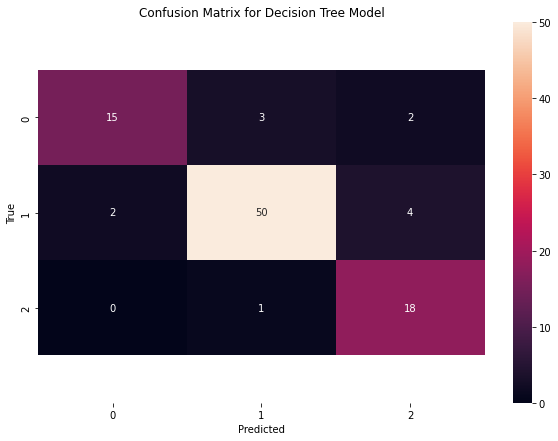

In [91]:
# Decision Tree
df_cm = pd.DataFrame(cm_tree, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix for Decision Tree Model')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix_tree_150', dpi = 150)
plt.savefig('confusion_matrix_tree_600', dpi = 600)
plt.show()

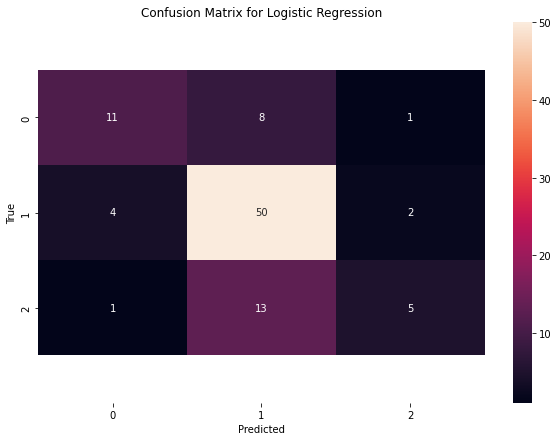

In [92]:
# logistic Regression
df_cm = pd.DataFrame(cm_logistic, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix_logistic_150', dpi = 150)
plt.savefig('confusion_matrix_logistic_600', dpi = 600)
plt.show()

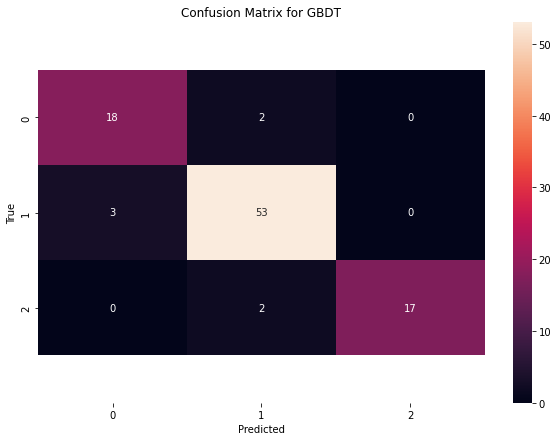

In [93]:
# GBDT
df_cm = pd.DataFrame(cm_GBDT, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix for GBDT')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix_GBDT_150', dpi = 150)
plt.savefig('confusion_matrix_GBDT_600', dpi = 600)
plt.show()

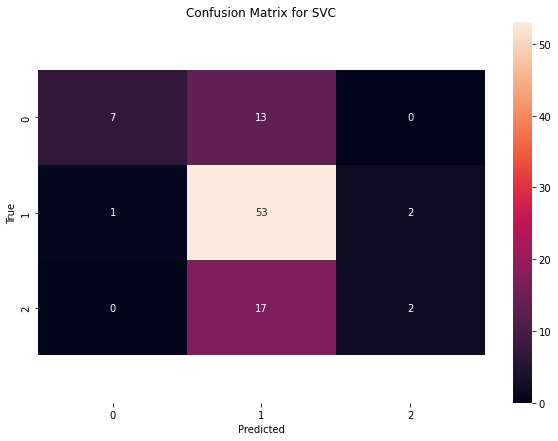

In [94]:
# SVC
df_cm = pd.DataFrame(cm_SVC, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix for SVC')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.savefig('confusion_matrix_SVC_150', dpi = 150)
plt.savefig('confusion_matrix_SVC_600', dpi = 600)
plt.show()

## Feature Importance

In [95]:
importances = model_tree.estimators_[1].feature_importances_
std = np.std([tree.feature_importances_ for tree in model_tree.estimators_],
             axis=0)
importance_map = {'importance': importances, 'standard deviation': std}
importance_df = pd.DataFrame(importance_map, columns = ['importance', 'standard deviation'], index = X.columns)
importance_df = importance_df.sort_values('importance', ascending= False)

In [96]:
importance_df.head()

,importance,standard deviation
Three Concave Sign（<=1/3 is mild；1：multiple lobar involvement are severe）：1 mild；2 severe,0.560946,0.116145
Cough Nature：0 without cough；1dry cough；2 phlegmy cough,0.078311,0.050565
Pleural Effusion：0 NO；1YES,0.044424,0.036235
Moist Crackles：0 NO；1 Left；2 Right；3 Two sides,0.041961,0.020653
CREA(Creatinine)(Umol/L）,0.039656,0.017871


In [97]:
importances = model_GBDT.estimators_[1].feature_importances_
std = np.std([tree.feature_importances_ for tree in model_GBDT.estimators_],
             axis=0)
importance_map = {'importance': importances, 'standard deviation': std}
importance_df = pd.DataFrame(importance_map, columns = ['importance', 'standard deviation'], index = X.columns)
importance_df = importance_df.sort_values('importance', ascending= False)

In [98]:
importance_df.head()

,importance,standard deviation
Three Concave Sign（<=1/3 is mild；1：multiple lobar involvement are severe）：1 mild；2 severe,0.592703,0.096594
Cough Nature：0 without cough；1dry cough；2 phlegmy cough,0.095375,0.053855
Pleural Effusion：0 NO；1YES,0.049189,0.036561
Rhonchus or Wheeze：0 NO；1Left；2 right；3 two sides,0.045303,0.025172
Moist Crackles：0 NO；1 Left；2 Right；3 Two sides,0.039956,0.026623


# Hasil Percobaan

## Import Package

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import keras_tuner as kt

## Setting Parameter

In [100]:
paramtree = [{'criterion': ['gini', 'entropy'], 'max_depth': [10, 15, 20, 25, 30]}]
paramlr = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': [100, 10, 1.0, 0.1, 0.01]}]
paramgbdt = [{'learning_rate': [0.001, 0.01, 0.1, 0.3], 'n_estimators': [10, 100, 1000]}]
paramsvc = [{'C': [100, 10, 1.0, 0.1, 0.001]}]

## -- Hyperband (Keras tuner)

### Build Model

In [4]:
def build_dt(hp):
  model = tree.DecisionTreeClassifier(
        criterion=hp.Choice('criterion', ['gini', 'entropy']),
        max_depth=hp.Choice('max_depth', [10, 15, 20, 25, 30]))
  return model

def build_lr(hp):
  model = LogisticRegression(
        solver=hp.Choice('solver', ['newton-cg', 'lbfgs']),
        penalty=hp.Choice('penalty', ['l2', 'none']),
        C=hp.Choice('C', [100.01, 10.01, 1.01, 0.1, 0.01]))
  return model

def build_gbdt(hp):
  model = GradientBoostingClassifier(
        learning_rate=hp.Choice('learning_rate', [0.001, 0.01, 0.1, 0.3]),
        n_estimators=hp.Choice('n_estimators', [10, 100, 1000]))
  return model

def build_svc(hp):
  model = LinearSVC(
        C=hp.Choice('C', [100.01, 10.01, 1.01, 0.1, 0.001]))
  return model

### Tuning Hyperband

In [5]:
tunerdt = kt.tuners.SklearnTuner(
    oracle=kt.oracles.HyperbandOracle(objective = kt.Objective('score', 'max')),
    hypermodel=build_dt,
    scoring=metrics.make_scorer(metrics.accuracy_score),
    cv=model_selection.StratifiedKFold(5),
    directory='.',
    overwrite=True)

tunerlr = kt.tuners.SklearnTuner(
    oracle=kt.oracles.HyperbandOracle(objective = kt.Objective('score', 'max')),
    hypermodel=build_lr,
    scoring=metrics.make_scorer(metrics.accuracy_score),
    cv=model_selection.StratifiedKFold(5),
    directory='.',
    overwrite=True)

tunergbdt = kt.tuners.SklearnTuner(
    oracle=kt.oracles.HyperbandOracle(objective = kt.Objective('score', 'max')),
    hypermodel=build_gbdt,
    scoring=metrics.make_scorer(metrics.accuracy_score),
    cv=model_selection.StratifiedKFold(5),
    directory='.',
    overwrite=True)

tunersvc = kt.tuners.SklearnTuner(
    oracle=kt.oracles.HyperbandOracle(objective = kt.Objective('score', 'max')),
    hypermodel=build_svc,
    scoring=metrics.make_scorer(metrics.accuracy_score),
    cv=model_selection.StratifiedKFold(5),
    directory='.',
    overwrite=True)

### Mendapatkan Model dengan Hyperparameter Terbaik

In [6]:
def get_model(X_train, y_train):
    all_tuner = [tunerdt, tunerlr, tunergbdt, tunersvc]
    allmodel = []
    for tuner in all_tuner:
        tuner.search(X_train, y_train)
        best_hp = tuner.get_best_hyperparameters()[0]
        model = tuner.hypermodel.build(best_hp)
        allmodel.append(model)
        
    return allmodel


dthb, lrhb, gbdthb, svchb = get_model(X_train.to_numpy(), Y_train.to_numpy())

Trial 5 Complete [00h 00m 01s]
score: 0.6865497076023391

Best score So Far: 0.6865497076023391
Total elapsed time: 00h 00m 08s
INFO:tensorflow:Oracle triggered exit


### Fitting Model

In [7]:
dt_hb = dthb.fit(X_train, Y_train)
hasiltreehb = dt_hb.predict(X_test)

lr_hb = lrhb.fit(X_train, Y_train)
hasillogistichb = lr_hb.predict(X_test) 

gbdt_hb = gbdthb.fit(X_train, Y_train)
hasilgbdthb = gbdt_hb.predict(X_test)

svc_hb = svchb.fit(X_train, Y_train)
hasilsvchb = svc_hb.predict(X_test)

C:\Users\h\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Akurasi

In [8]:
acg = {'Decision Tree': np.mean(hasiltreehb == Y_test),'Logistics': np.mean(hasillogistichb == Y_test), 'GBDT': np.mean(hasilgbdthb == Y_test), 'SVC': np.mean(hasilsvchb == Y_test)}
acg

{'Decision Tree': 0.8947368421052632,
 'Logistics': 0.9473684210526315,
 'GBDT': 0.9157894736842105,
 'SVC': 0.7157894736842105}

### F-score

In [9]:
(_, _, ftreehb, _) = precision_recall_fscore_support(Y_test, hasiltreehb, average='macro')
(_, _, floghb, _) = precision_recall_fscore_support(Y_test, hasillogistichb, average='macro')
(_, _, fgbdthb, _) = precision_recall_fscore_support(Y_test, hasilgbdthb, average='macro')
(_, _, fsvchb, _) = precision_recall_fscore_support(Y_test, hasilsvchb, average='macro')

print('DT: {}, LR: {}, GBDT: {}, SVC: {}'.format(ftreehb, floghb, fgbdthb, fsvchb))

DT: 0.8872053872053871, LR: 0.9429083951207845, GBDT: 0.9100529100529101, SVC: 0.5918977610553698


## -- Grid Search

In [101]:
gs1 = GridSearchCV(tree.DecisionTreeClassifier(), paramtree, scoring='accuracy')
gs1.fit(X_train, Y_train) # DT

gs2 = GridSearchCV(LogisticRegression(), paramlr, scoring='accuracy')
gs2.fit(X_train, Y_train) # LR

gs3 = GridSearchCV(GradientBoostingClassifier(), paramgbdt, scoring='accuracy')
gs3.fit(X_train, Y_train) # GBDT

gs4 = GridSearchCV(LinearSVC(), paramsvc, scoring='accuracy')
gs4.fit(X_train, Y_train) # SVC

GridSearchCV(estimator=LinearSVC(),
             param_grid=[{'C': [100, 10, 1.0, 0.1, 0.001]}],
             scoring='accuracy')

### Parameter Terbaik

In [102]:
print(gs1.best_params_) # DT
print(gs2.best_params_) # LR
print(gs3.best_params_) # GBDT
print(gs4.best_params_) # SVC

{'criterion': 'entropy', 'max_depth': 30}
{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
{'learning_rate': 0.01, 'n_estimators': 1000}
{'C': 0.001}


### Inisialisasi Model

In [118]:
treegs = OneVsRestClassifier(tree.DecisionTreeClassifier(criterion='entropy', max_depth=30)).fit(X_train,Y_train)
hasiltreegs = treegs.predict(X_test) # DT

logisticgs = OneVsRestClassifier(LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')).fit(X_train,Y_train)
hasillogisticgs = logisticgs.predict(X_test) # LR

gbdtgs = OneVsRestClassifier(GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000)).fit(X_train,Y_train)
hasilgbdtgs = gbdtgs.predict(X_test) # GBDT

svcgs = OneVsRestClassifier(LinearSVC(C=0.001)).fit(X_train,Y_train)
hasilsvcgs = svcgs.predict(X_test) # SVC

### Akurasi

In [123]:
acg = {'Decision Tree': np.mean(hasiltreegs == Y_test),'Logistics': np.mean(hasillogisticgs == Y_test), 'GBDT': np.mean(hasilgbdtgs == Y_test), 'SVC': np.mean(hasilsvcgs == Y_test)}

In [124]:
acg

{'Decision Tree': 0.8842105263157894,
 'Logistics': 0.9157894736842105,
 'GBDT': 0.9263157894736842,
 'SVC': 0.7052631578947368}

### F-score

In [125]:
(_, _, ftreegs, _) = precision_recall_fscore_support(Y_test, hasiltreegs, average='macro')
(_, _, floggs, _) = precision_recall_fscore_support(Y_test, hasillogisticgs, average='macro')
(_, _, fgbdtgs, _) = precision_recall_fscore_support(Y_test, hasilgbdtgs, average='macro')
(_, _, fsvcgs, _) = precision_recall_fscore_support(Y_test, hasilsvcgs, average='macro')

print('DT: {}, LR: {}, GBDT: {}, SVC: {}'.format(ftreegs, floggs, fgbdtgs, fsvcgs))

DT: 0.8655819193813423, LR: 0.9037514209928004, GBDT: 0.9217007705379799, SVC: 0.5811334590404358


## -- Random Search

In [107]:
rs1 = RandomizedSearchCV(tree.DecisionTreeClassifier(), paramtree, scoring='accuracy')
rs1.fit(X_train, Y_train) # DT

rs2 = RandomizedSearchCV(LogisticRegression(), paramlr, scoring='accuracy')
rs2.fit(X_train, Y_train) # LR

rs3 = RandomizedSearchCV(GradientBoostingClassifier(), paramgbdt, scoring='accuracy')
rs3.fit(X_train, Y_train) # GBDT

rs4 = RandomizedSearchCV(LinearSVC(), paramsvc, scoring='accuracy')
rs4.fit(X_train, Y_train) # SVC

RandomizedSearchCV(estimator=LinearSVC(),
                   param_distributions=[{'C': [100, 10, 1.0, 0.1, 0.001]}],
                   scoring='accuracy')

### Parameter Terbaik

In [108]:
print(rs1.best_params_) # DT
print(rs2.best_params_) # LR
print(rs3.best_params_) # GBDT
print(rs4.best_params_) # SVC

{'max_depth': 20, 'criterion': 'entropy'}
{'solver': 'liblinear', 'penalty': 'l1', 'C': 100}
{'n_estimators': 10, 'learning_rate': 0.3}
{'C': 0.001}


In [122]:
treers = OneVsRestClassifier(tree.DecisionTreeClassifier(criterion='entropy', max_depth=20)).fit(X_train,Y_train)
hasiltreers = treers.predict(X_test) # DT

logisticrs = OneVsRestClassifier(LogisticRegression(C=100, penalty='l1', solver='liblinear')).fit(X_train,Y_train)
hasillogisticrs = logisticrs.predict(X_test) # LR

gbdtrs = OneVsRestClassifier(GradientBoostingClassifier(learning_rate=0.3, n_estimators=10)).fit(X_train,Y_train)
hasilgbdtrs = gbdtrs.predict(X_test) # GBDT

svcrs = OneVsRestClassifier(LinearSVC(C=0.001)).fit(X_train,Y_train)
hasilsvcrs = svcrs.predict(X_test) # SVC

### Akurasi

In [126]:
acr = {'Decision Tree': np.mean(hasiltreers == Y_test),'Logistics': np.mean(hasillogisticrs == Y_test), 'GBDT': np.mean(hasilgbdtrs == Y_test), 'SVC': np.mean(hasilsvcrs == Y_test)}

In [127]:
acr

{'Decision Tree': 0.8315789473684211,
 'Logistics': 0.9263157894736842,
 'GBDT': 0.9157894736842105,
 'SVC': 0.6842105263157895}

### F-score

In [128]:
(_, _, ftreers, _) = precision_recall_fscore_support(Y_test, hasiltreers, average='macro')
(_, _, flogrs, _) = precision_recall_fscore_support(Y_test, hasillogisticrs, average='macro')
(_, _, fgbdtrs, _) = precision_recall_fscore_support(Y_test, hasilgbdtrs, average='macro')
(_, _, fsvcrs, _) = precision_recall_fscore_support(Y_test, hasilsvcrs, average='macro')

print('DT: {}, LR: {}, GBDT: {}, SVC: {}'.format(ftreers, flogrs, fgbdtrs, fsvcrs))

DT: 0.8077441077441078, LR: 0.920784712825791, GBDT: 0.9100529100529101, SVC: 0.5606201550387596
